In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('LaptopPrices.csv')

In [54]:
df.head()

,Unnamed: 0,Product Name,Processor Type,RAM,Storage,Display,Price
0,0,"Lenovo IdeaPad D330 10IGL Celeron N4020 10.1"" ...","Intel Celeron N4020 (4M Cache,1.10 GHz up to 2...",4GB DDR4,128GB eMMC SSD,"10.1"" (1280 x 800) HD Touchscreen","34,500"
1,1,"Lenovo IdeaPad 1 14AMN7 AMD Ryzen 5 14"" FHD La...",AMD Ryzen 5 7520U (2.8 GHz up to 4.3 GHz),"8GB DDR5 5500MHz,",256GB SSD,"14"" FHD (1920X1080)","60,500"
2,2,"MSI Modern 14 C12M Core i3 12th Gen 14"" FHD La...","Intel Core i3-1215U (10M Cache, 3.30 GHz, up t...","8GB 3200MHz,",512GB SSD,"14"" FHD (1920 x 1080)","59,999"
3,3,Acer Extensa 14 EX214-53-543W Core i5 12th Gen...,"Intel Core i5-1240P Processor (12M Cache, up t...","8GB DDR4,",512GB SSD,"14"" FHD (1920 x 1080)","79,999"
4,4,Apple MacBook Pro 14 inch M3 Chip Liquid Retin...,"Apple M3 chip with 8-core CPU, 10-core GPU, 16...","8GB,",512GB SSD,"14.2"" Liquid Retina display (3024 x 1664)","228,000"


In [55]:
df.tail()

,Unnamed: 0,Product Name,Processor Type,RAM,Storage,Display,Price
616,616,Apple MacBook Pro (2023) Apple M2 Max Chip 32G...,Apple M2,32GB,1TB SSD,16.2,"465,000"
617,617,Apple MacBook Pro (Late 2021) Apple M1 Max Chi...,Apple M3,64GB,4TB SSD,16.2,"479,000"
618,618,Apple Macbook Pro (Early 2023) Apple M2 Max Ch...,Apple M3,32GB,2TB SSD,16.2,"495,000 (Estimated)"
619,619,Apple Macbook Pro (Late 2023) Apple M3 Max 48G...,Apple M3,48GB,1TB SSD,16.2,"538,000 (Estimated)"
620,620,Apple Macbook Pro (Late 2023) Apple M3 Max 48G...,Apple M3,48GB,1TB SSD,16.2,"540,000 (Estimated)"


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      621 non-null    int64 
 1   Product Name    621 non-null    object
 2   Processor Type  621 non-null    object
 3   RAM             621 non-null    object
 4   Storage         621 non-null    object
 5   Display         621 non-null    object
 6   Price           621 non-null    object
dtypes: int64(1), object(6)
memory usage: 34.1+ KB


**We can see that the price column is "object" type, when it should be "int64" type. This happened because there are unnecessary letters or words attatched to the prices in the dataset, for example: "495,000 (Estimated)". Spliting at " " (space) and removing whatever comes after the space should take care of the issue.**

In [57]:
# Split the "Price" column at each space and select the first part
df['Price'] = df['Price'].str.split(' ').str[0]

In [58]:
df.tail()

,Unnamed: 0,Product Name,Processor Type,RAM,Storage,Display,Price
616,616,Apple MacBook Pro (2023) Apple M2 Max Chip 32G...,Apple M2,32GB,1TB SSD,16.2,"465,000"
617,617,Apple MacBook Pro (Late 2021) Apple M1 Max Chi...,Apple M3,64GB,4TB SSD,16.2,"479,000"
618,618,Apple Macbook Pro (Early 2023) Apple M2 Max Ch...,Apple M3,32GB,2TB SSD,16.2,"495,000"
619,619,Apple Macbook Pro (Late 2023) Apple M3 Max 48G...,Apple M3,48GB,1TB SSD,16.2,"538,000"
620,620,Apple Macbook Pro (Late 2023) Apple M3 Max 48G...,Apple M3,48GB,1TB SSD,16.2,"540,000"


In [59]:
# Remove commas from the "Price" column
df['Price'] = df['Price'].str.replace(',', '')

In [60]:
# Remove commas from the "RAM" column
df['RAM'] = df['RAM'].str.replace(',', '')

In [61]:
df.tail()

,Unnamed: 0,Product Name,Processor Type,RAM,Storage,Display,Price
616,616,Apple MacBook Pro (2023) Apple M2 Max Chip 32G...,Apple M2,32GB,1TB SSD,16.2,465000
617,617,Apple MacBook Pro (Late 2021) Apple M1 Max Chi...,Apple M3,64GB,4TB SSD,16.2,479000
618,618,Apple Macbook Pro (Early 2023) Apple M2 Max Ch...,Apple M3,32GB,2TB SSD,16.2,495000
619,619,Apple Macbook Pro (Late 2023) Apple M3 Max 48G...,Apple M3,48GB,1TB SSD,16.2,538000
620,620,Apple Macbook Pro (Late 2023) Apple M3 Max 48G...,Apple M3,48GB,1TB SSD,16.2,540000


In [62]:
# Convert the "Price" column to numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [63]:
# Check if there are any NaN values in the DataFrame
any_nan = df.isnull().any().any()

# Print the result
print(any_nan)

False


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      621 non-null    int64 
 1   Product Name    621 non-null    object
 2   Processor Type  621 non-null    object
 3   RAM             621 non-null    object
 4   Storage         621 non-null    object
 5   Display         621 non-null    object
 6   Price           621 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 34.1+ KB


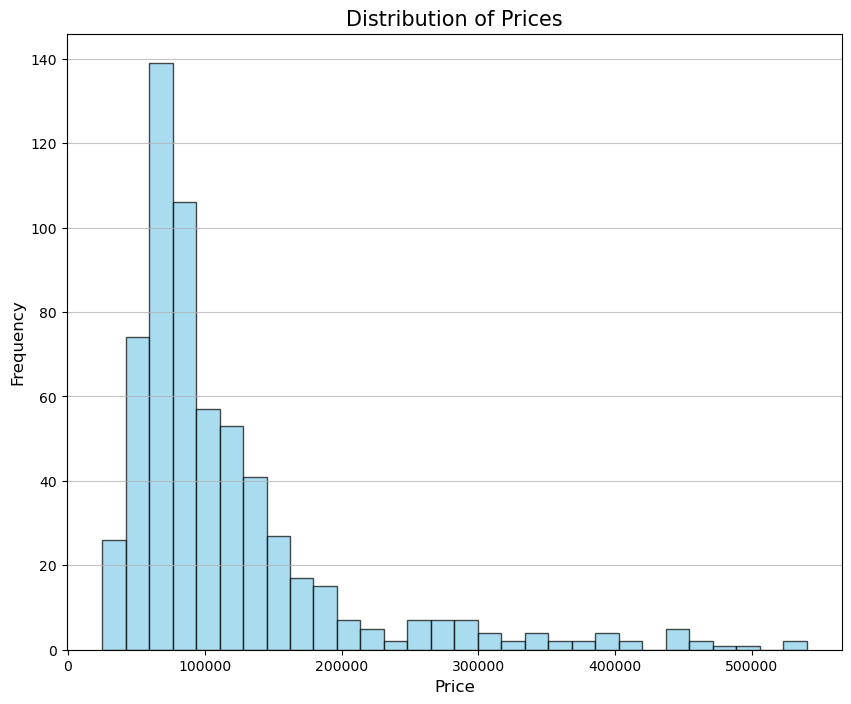

In [65]:
# Create a histogram with a color map, gridlines, and adjusted transparency
plt.figure(figsize=(10, 8))
plt.hist(df['Price'], bins=30, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Distribution of Prices', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

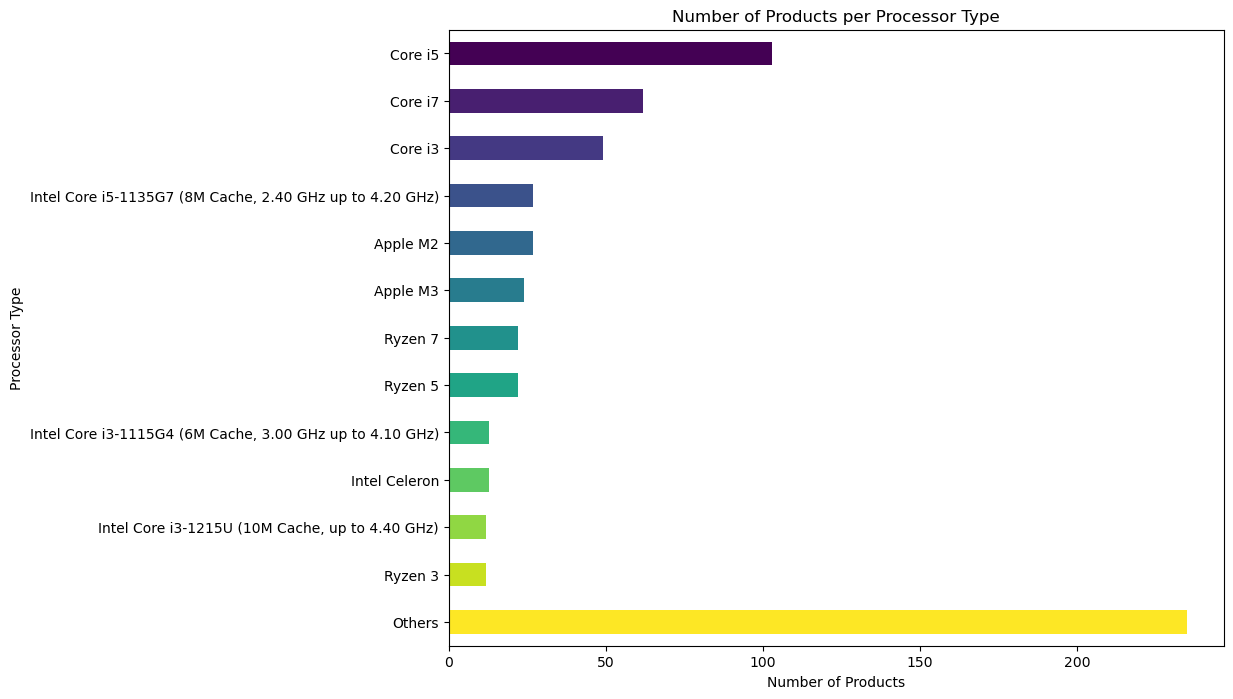

In [66]:
# Count the number of products for each processor type
processor_counts = df['Processor Type'].value_counts()

# Select the top 12 processor types
top_processors = processor_counts[:12]

# Group the rest into an "Others" category
if len(processor_counts) > 12:
    top_processors.loc['Others'] = processor_counts[12:].sum()

# Create a horizontal bar plot with a color map
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_processors)))
top_processors.plot(kind='barh', color=colors)
plt.title('Number of Products per Processor Type')
plt.xlabel('Number of Products')
plt.ylabel('Processor Type')
plt.gca().invert_yaxis()  # Invert the y-axis to display the processor type with the most products at the top
plt.show()

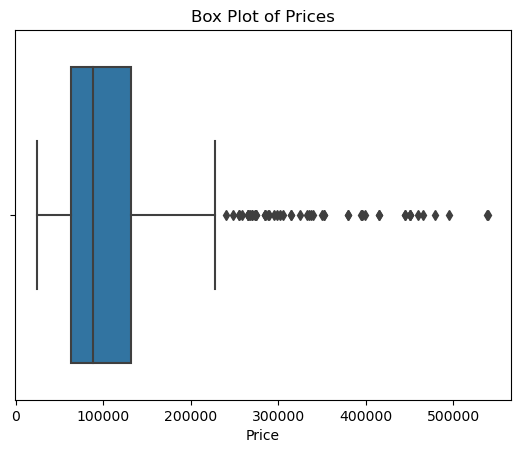

In [67]:
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Prices')
plt.show()

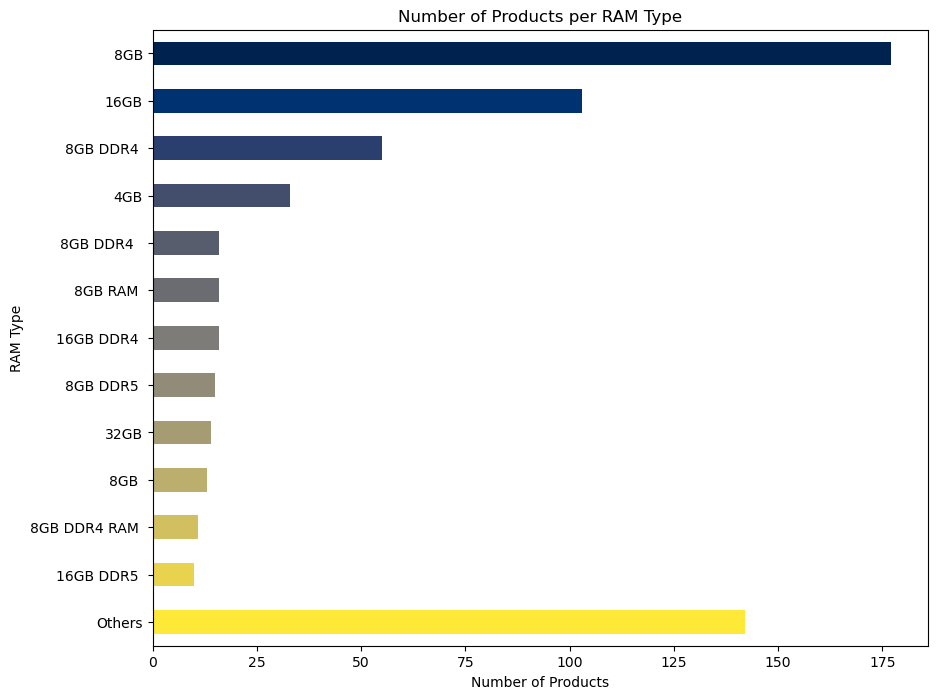

In [68]:
# Count the number of products for each RAM type
ram_counts = df['RAM'].value_counts()

# Select the top 12 RAM types
top_ram = ram_counts[:12]

# Group the rest into an "Others" category
if len(ram_counts) > 12:
    top_ram.loc['Others'] = ram_counts[12:].sum()

# Create a horizontal bar plot with a different color map
plt.figure(figsize=(10, 8))
colors = plt.cm.cividis(np.linspace(0, 1, len(top_ram)))
top_ram.plot(kind='barh', color=colors)
plt.title('Number of Products per RAM Type')
plt.xlabel('Number of Products')
plt.ylabel('RAM Type')
plt.gca().invert_yaxis()  # Invert the y-axis to display the RAM type with the most products at the top
plt.show()
